In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
dataset=files.upload()

Saving housing.csv to housing.csv


In [4]:
data=pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [5]:
# Q2 Number of Rows and Contents of the File
num_rows=data.shape[0]
print(f"Number of rows: {num_rows}")
print("\nContents of the file:")
print(data)

Number of rows: 20640

Contents of the file:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

      

In [6]:
# Q3 Data Description using describe()
desc_stats=data.describe()
desc_stats

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


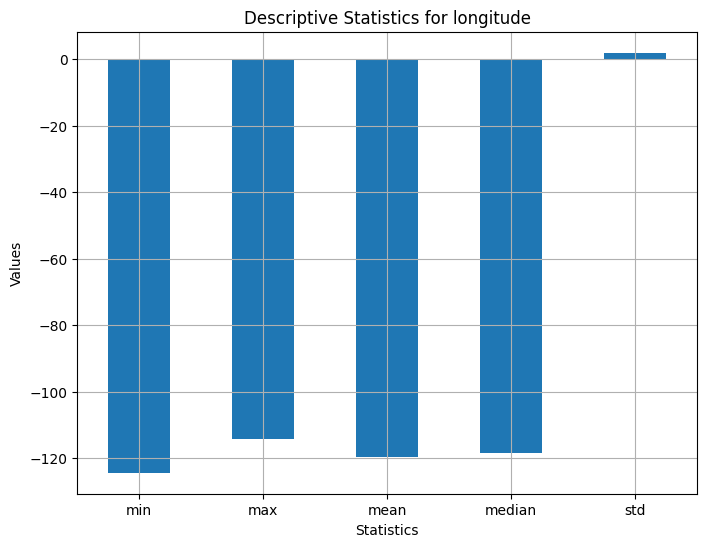

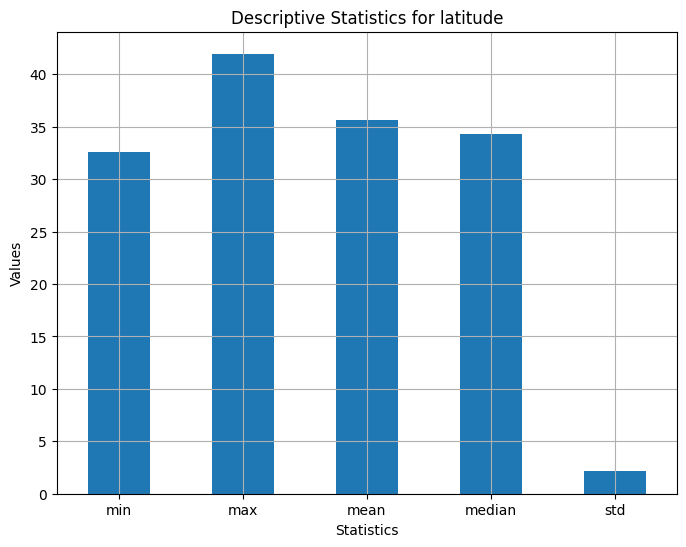

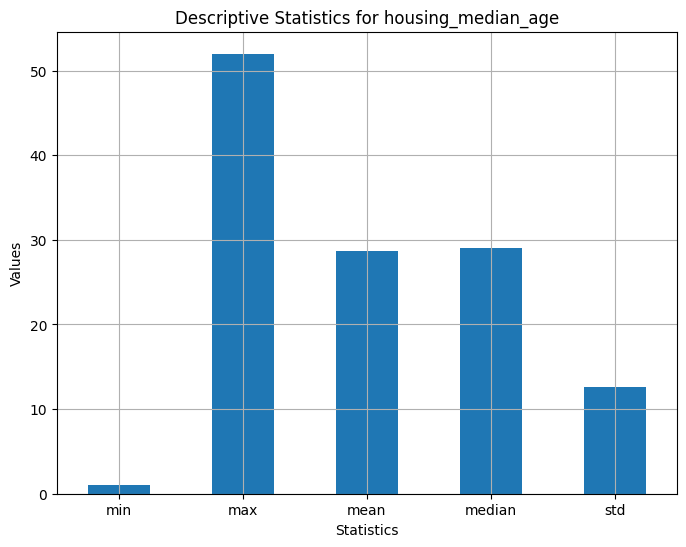

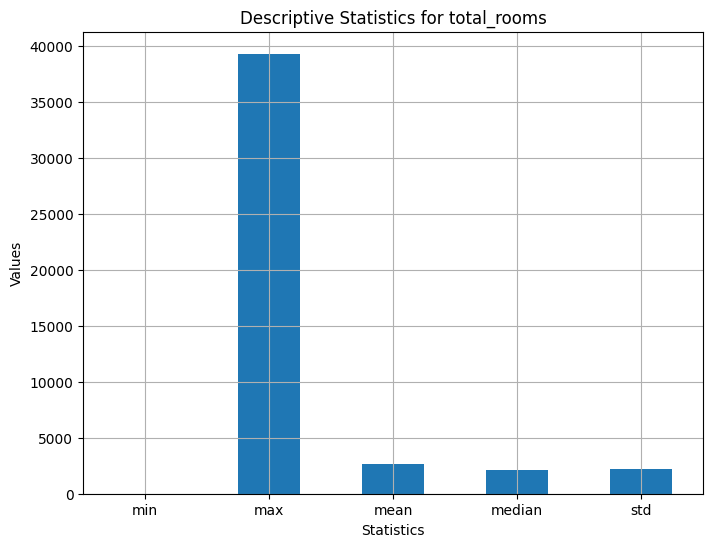

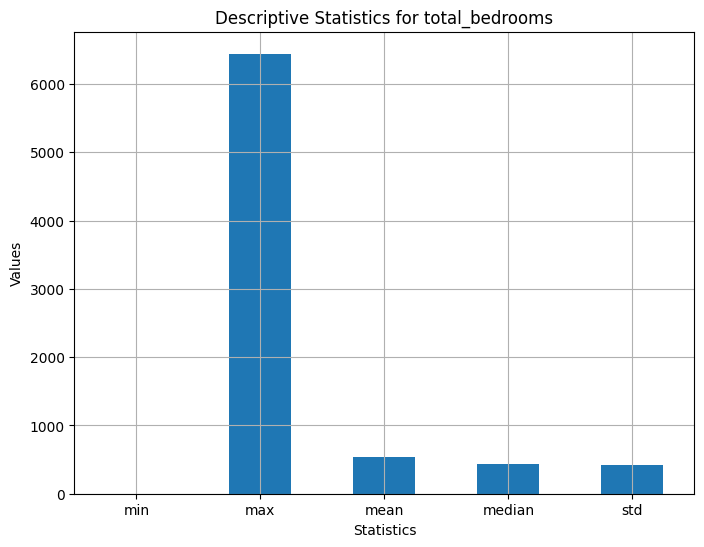

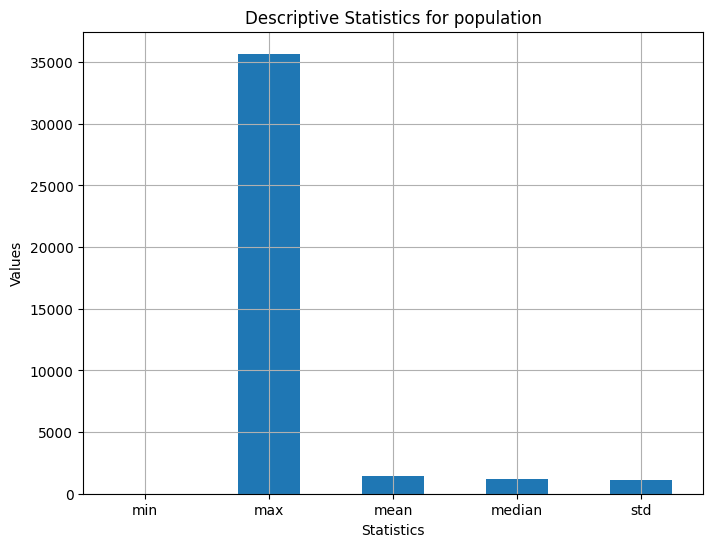

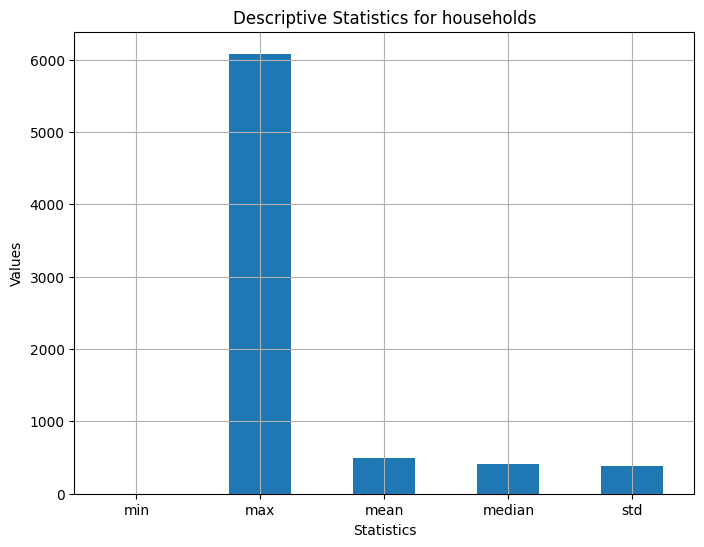

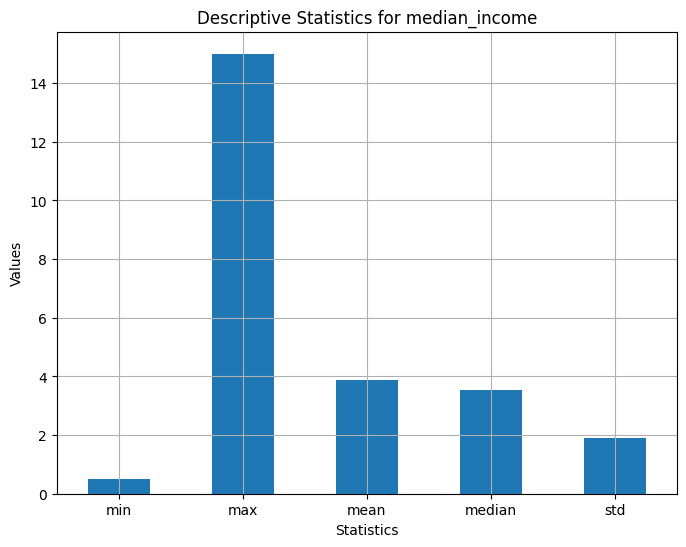

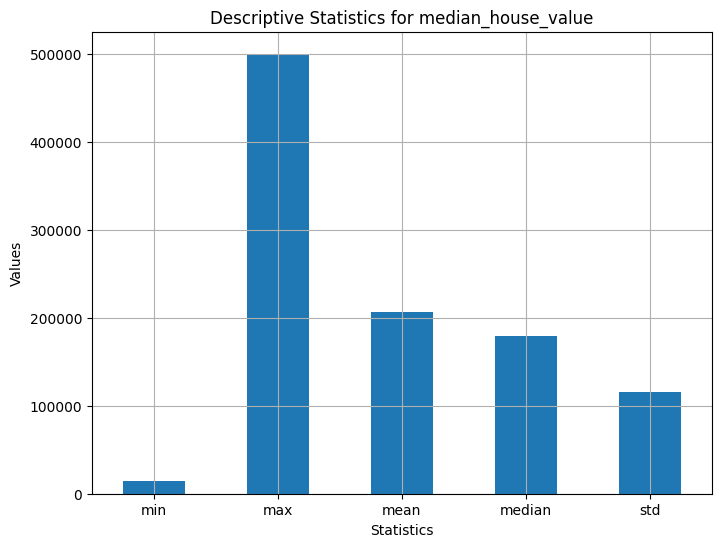

In [7]:
# Q4 Data Description Visualised
numeric_columns = data.select_dtypes(include=[np.number])
desc_stats = numeric_columns.describe()
desc_stats.loc['median'] = numeric_columns.median()
for column in numeric_columns.columns:
    stats = {
        'min': desc_stats.loc['min', column],
        'max': desc_stats.loc['max', column],
        'mean': desc_stats.loc['mean', column],
        'median': numeric_columns[column].median(),
        'std': desc_stats.loc['std', column]
    }

    stats_df = pd.DataFrame.from_dict(stats, orient='index', columns=[column])

    stats_df.plot(kind='bar', legend=False, figsize=(8, 6))
    plt.title(f'Descriptive Statistics for {column}')
    plt.xlabel('Statistics')
    plt.ylabel('Values')
    plt.xticks(rotation=0)
    plt.grid(True)
    plt.show()

In [8]:
# Q5 Imputing the missing values with median
missing_values = data.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
num_rows_with_missing_values = data.isnull().any(axis=1).sum()

print("Columns with missing values:\n", columns_with_missing_values)
print("Number of rows with missing values:", num_rows_with_missing_values)

data_imputed = data.copy()
for column in columns_with_missing_values.index:
    median_value = data_imputed[column].median()
    data_imputed[column].fillna(median_value, inplace=True)

print('Data imputed successfully with median')

Columns with missing values:
 total_bedrooms    207
dtype: int64
Number of rows with missing values: 207
Data imputed successfully with median


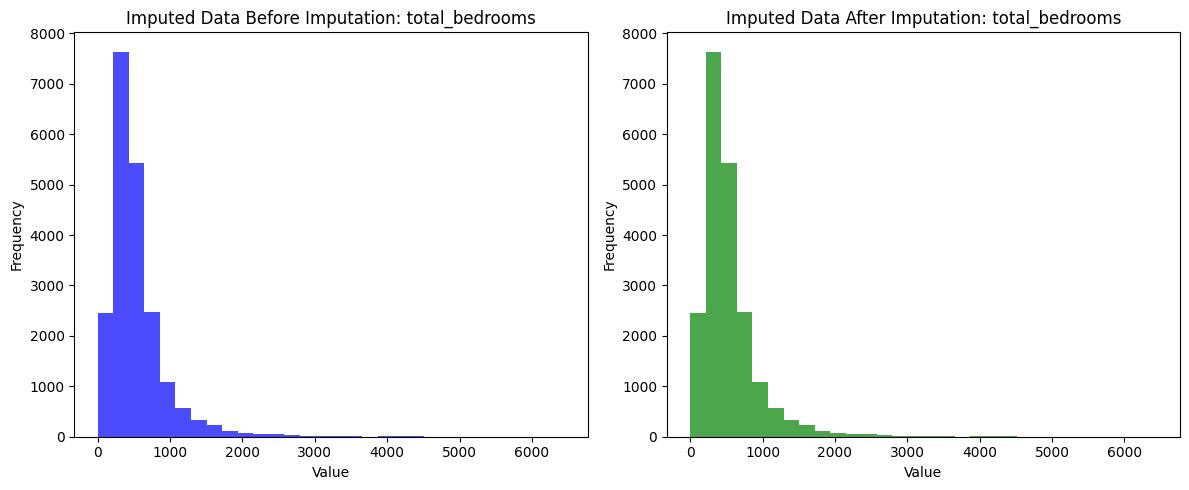

In [10]:
# Q6 Plotting the difference between the imputed and the actual values
def plot_distributions(df, columns_with_missing_values, title_prefix=''):
    num_columns = len(columns_with_missing_values)
    fig, axes = plt.subplots(num_columns, 2, figsize=(12, num_columns * 5))

    if num_columns == 1:
        axes = axes.reshape(1, 2)

    for i, column in enumerate(columns_with_missing_values.index):
        ax_before = axes[i, 0]
        ax_after = axes[i, 1]

        df[column].plot(kind='hist', ax=ax_before, bins=30, alpha=0.7, color='blue')
        ax_before.set_title(f'{title_prefix} Before Imputation: {column}')
        ax_before.set_xlabel('Value')
        ax_before.set_ylabel('Frequency')

        df[column].plot(kind='hist', ax=ax_after, bins=30, alpha=0.7, color='green')
        ax_after.set_title(f'{title_prefix} After Imputation: {column}')
        ax_after.set_xlabel('Value')
        ax_after.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

df = pd.read_csv('housing.csv')

missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]

for column in columns_with_missing_values.index:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

plot_distributions(df , columns_with_missing_values, title_prefix='Imputed Data')


In [ ]:
# Q7 Removing Duplicates from Data
data_cleaned = data.drop_duplicates()
data_cleaned.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


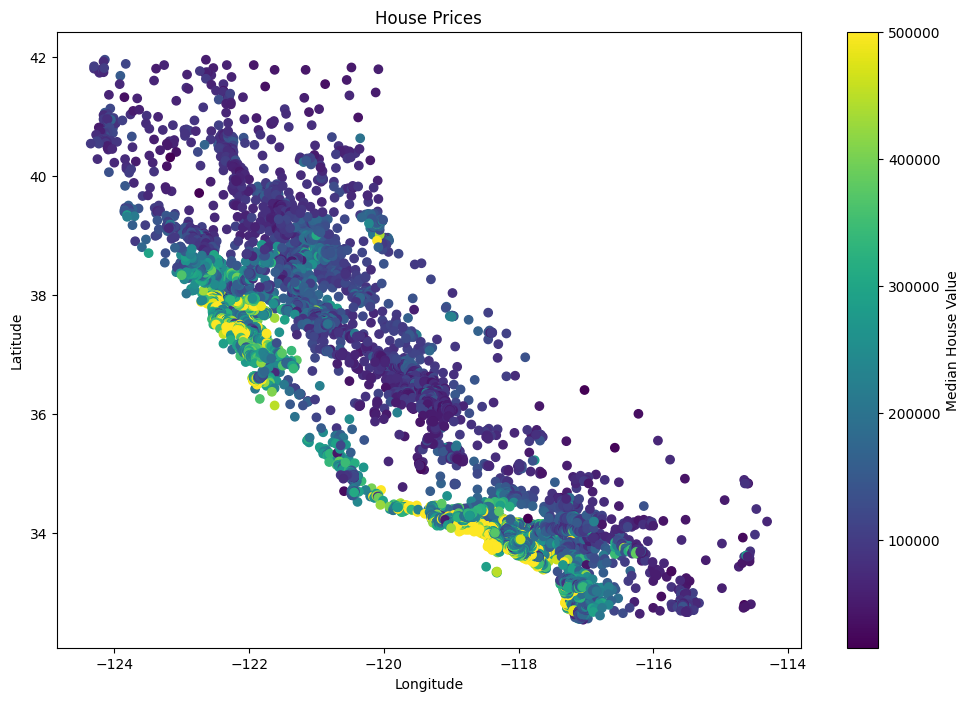

In [ ]:
# Q8 Scatter Plot for Original Dataset
data=pd.read_csv('housing.csv')
longitude = data['longitude']
latitude = data['latitude']
median_house_value = data['median_house_value']
plt.figure(figsize=(12, 8))
scatter = plt.scatter(longitude, latitude, c=median_house_value, cmap='viridis')
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Prices')
plt.show()

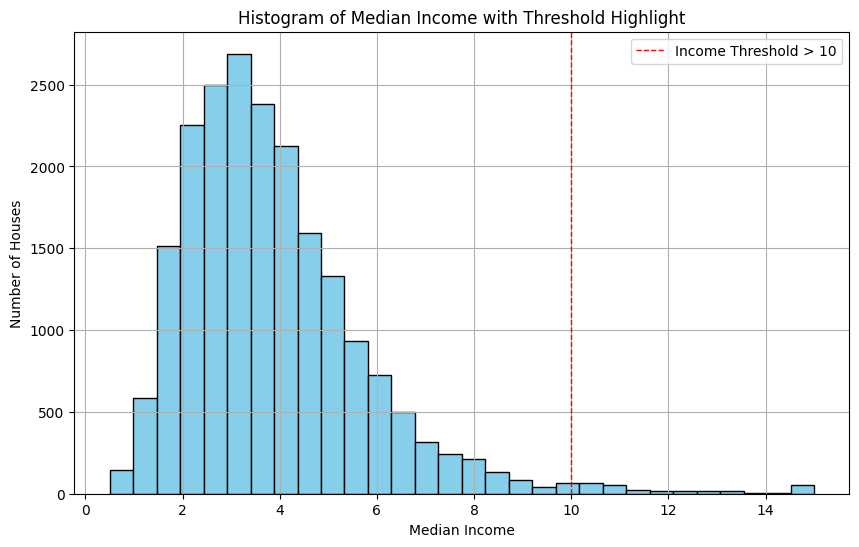

In [ ]:
# Q9 Observations on Specific Columns of the Original Dataset
num_income_greater_than_10 = data[data['median_income'] > 10].shape[0]
num_income_less_or_equal_than_10 = data.shape[0] - num_income_greater_than_10
categories = ['Median Income > 10', 'Median Income ≤ 10']
counts = [num_income_greater_than_10, num_income_less_or_equal_than_10]
threshold = 10
plt.figure(figsize=(10, 6))
plt.hist(data['median_income'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=1, label='Income Threshold > 10')
plt.xlabel('Median Income')
plt.ylabel('Number of Houses')
plt.title('Histogram of Median Income with Threshold Highlight')
plt.legend()
plt.grid(True)
plt.show()

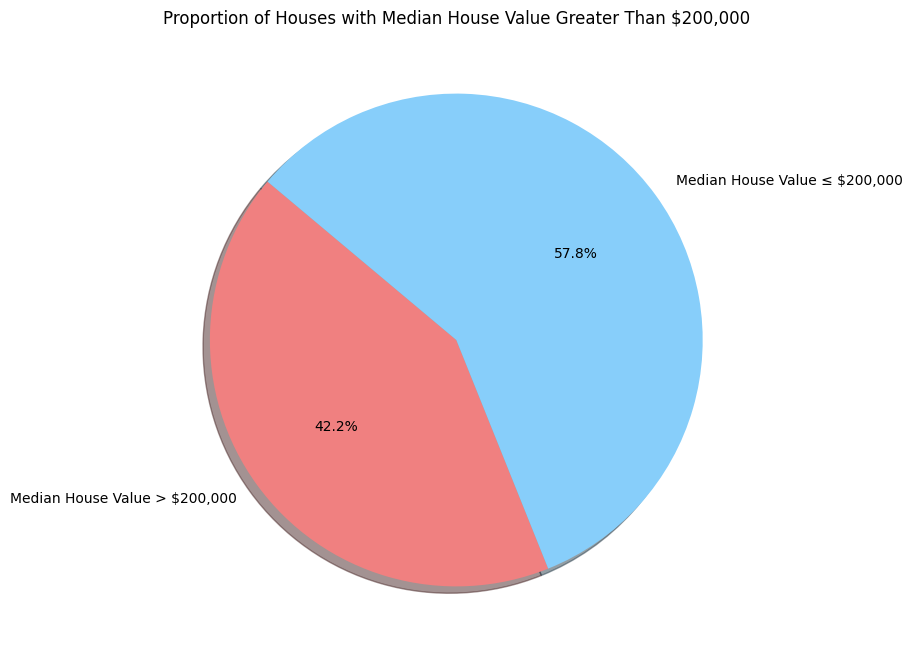

In [ ]:
# Q9 Observations on Specific Columns of the Original Dataset
threshold = 200000
num_above_threshold = data[data['median_house_value'] > threshold].shape[0]
num_below_or_equal_threshold = data.shape[0] - num_above_threshold
sizes = [num_above_threshold, num_below_or_equal_threshold]
labels = ['Median House Value > $200,000', 'Median House Value ≤ $200,000']
colors = ['lightcoral', 'lightskyblue']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Proportion of Houses with Median House Value Greater Than $200,000')
plt.show()

                longitude                                                 \
                    count        mean       std     min     25%      50%   
ocean_proximity                                                            
<1H OCEAN          9136.0 -118.847766  1.588888 -124.14 -118.50 -118.275   
INLAND             6551.0 -119.732990  1.900950 -123.73 -121.35 -120.000   
ISLAND                5.0 -118.354000  0.070569 -118.48 -118.33 -118.320   
NEAR BAY           2290.0 -122.260694  0.147004 -122.59 -122.41 -122.250   
NEAR OCEAN         2658.0 -119.332555  2.327307 -124.35 -122.02 -118.260   

                                  latitude             ... median_income  \
                      75%     max    count       mean  ...           75%   
ocean_proximity                                        ...                 
<1H OCEAN       -118.0000 -116.62   9136.0  34.560577  ...      5.180500   
INLAND          -117.8400 -114.31   6551.0  36.731829  ...      3.961500   
ISLAND     

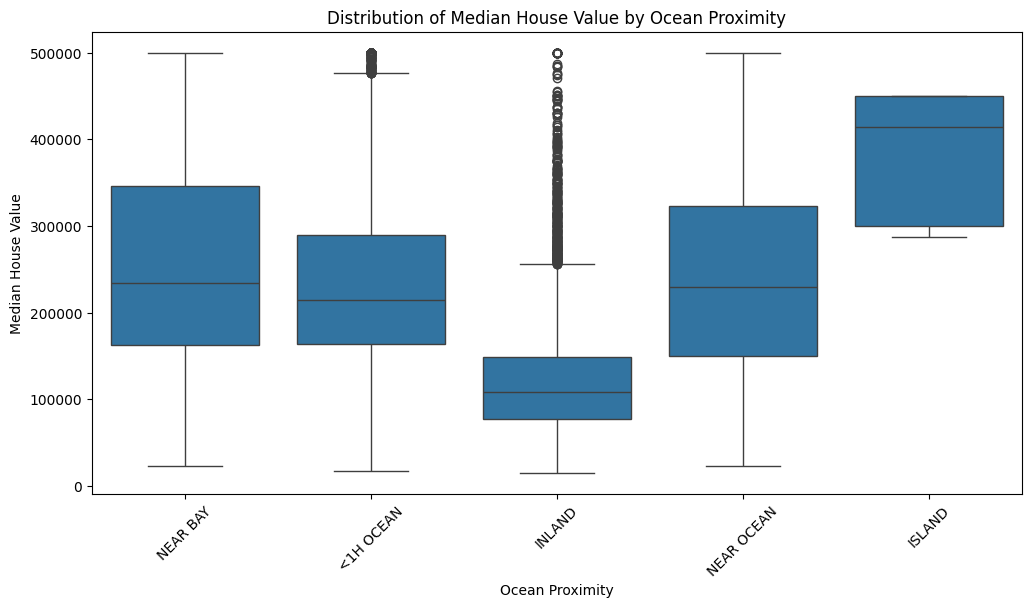

  ocean_proximity  ocean_proximity_encoded
0        NEAR BAY                        3
1        NEAR BAY                        3
2        NEAR BAY                        3
3        NEAR BAY                        3
4        NEAR BAY                        3


In [ ]:
# Q10 Relationship between ocean_proximity with numerical features

data = pd.read_csv('housing.csv')

grouped = data.groupby('ocean_proximity').describe()
print(grouped)


plt.figure(figsize=(12, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)
plt.title('Distribution of Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.xticks(rotation=45)
plt.show()

from sklearn.preprocessing import LabelEncoder
ocean_proximity_le = LabelEncoder()
data['ocean_proximity_encoded'] = ocean_proximity_le.fit_transform(data['ocean_proximity'])
print(data[['ocean_proximity', 'ocean_proximity_encoded']].head())

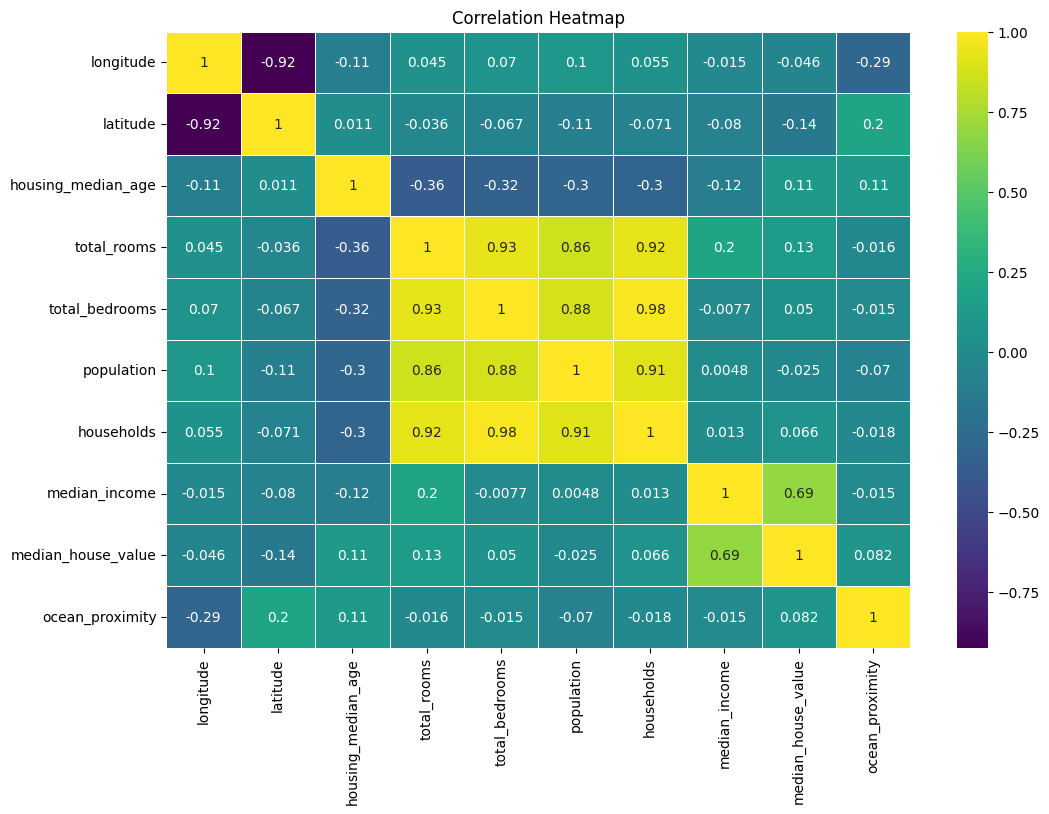

In [ ]:
# Q11
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('housing.csv')
ocean_proximity_le = LabelEncoder()
data['ocean_proximity'] = ocean_proximity_le.fit_transform(data['ocean_proximity'])

# Part (a): Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

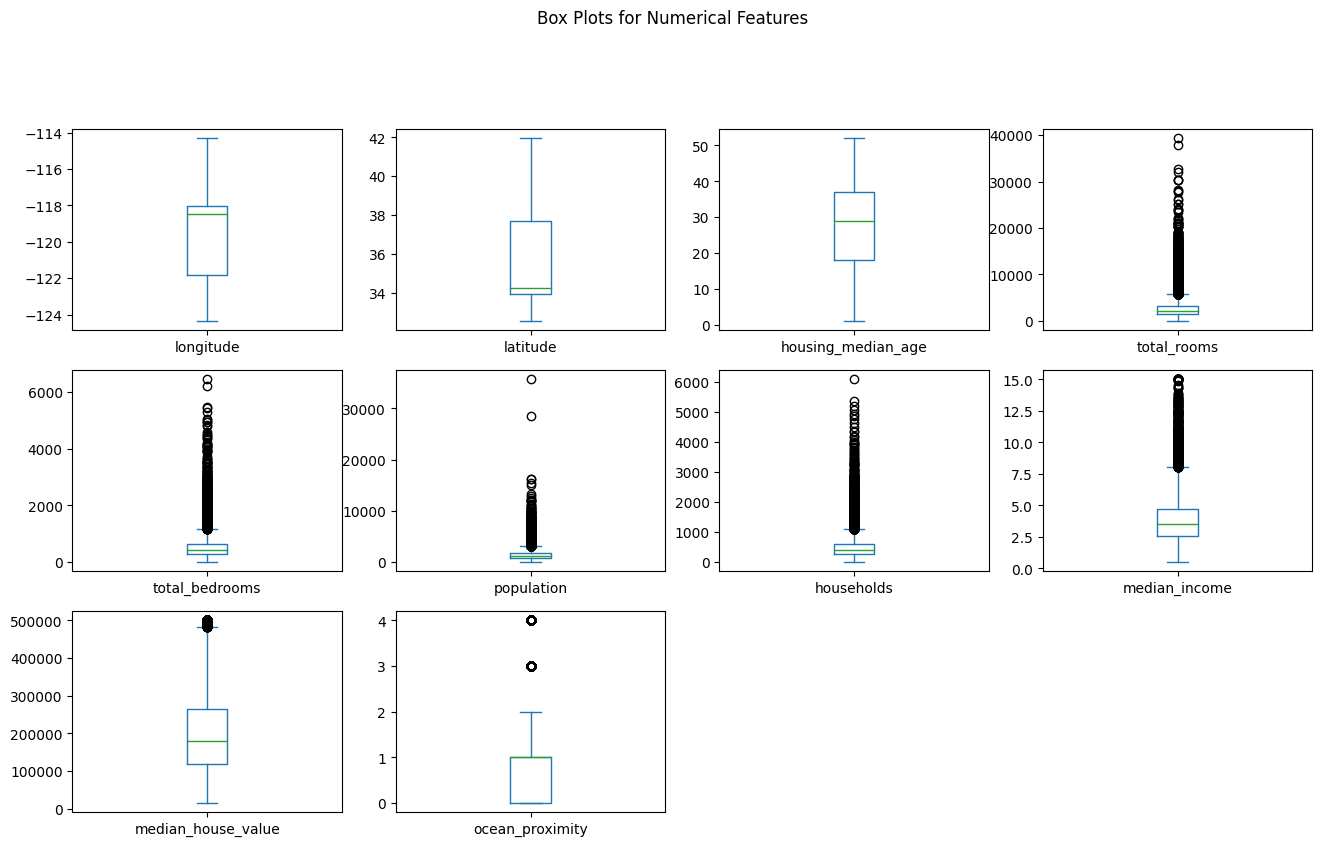

In [ ]:
# Part (b): Box Plots for All Numerical Features
data.plot(kind='box', subplots=True, layout=(4, 4), figsize=(16, 12), sharex=False, sharey=False, vert=True)
plt.suptitle('Box Plots for Numerical Features')
plt.show()


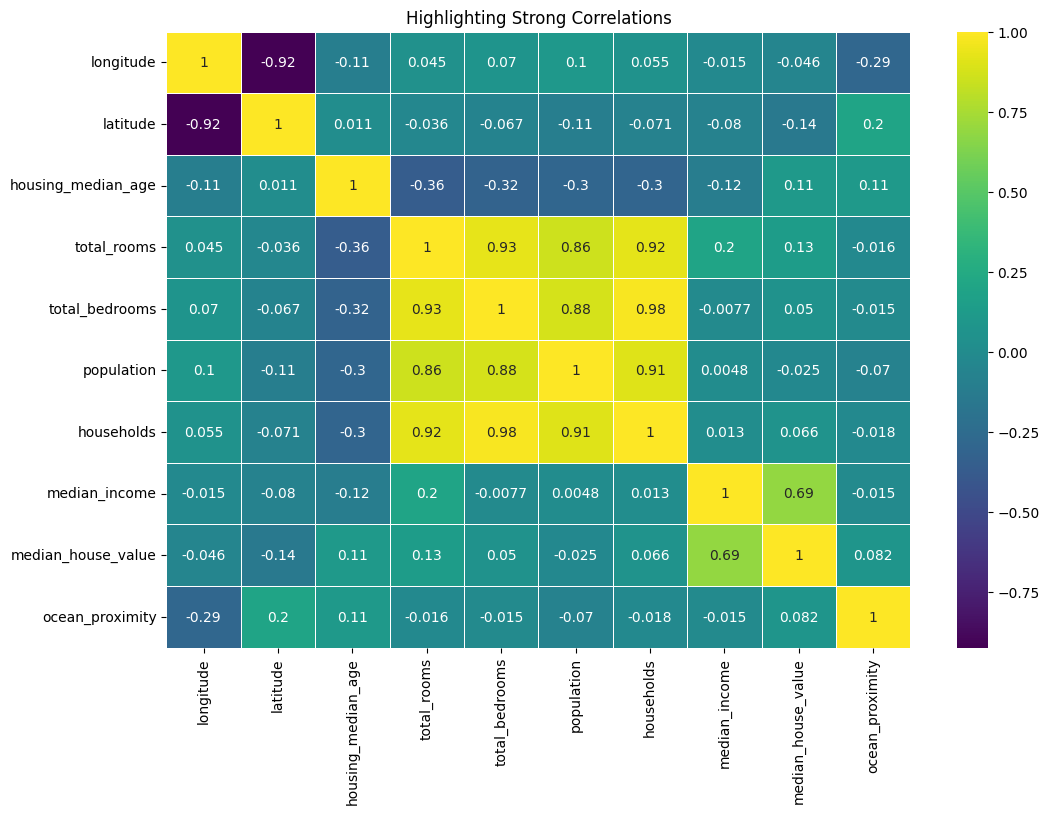

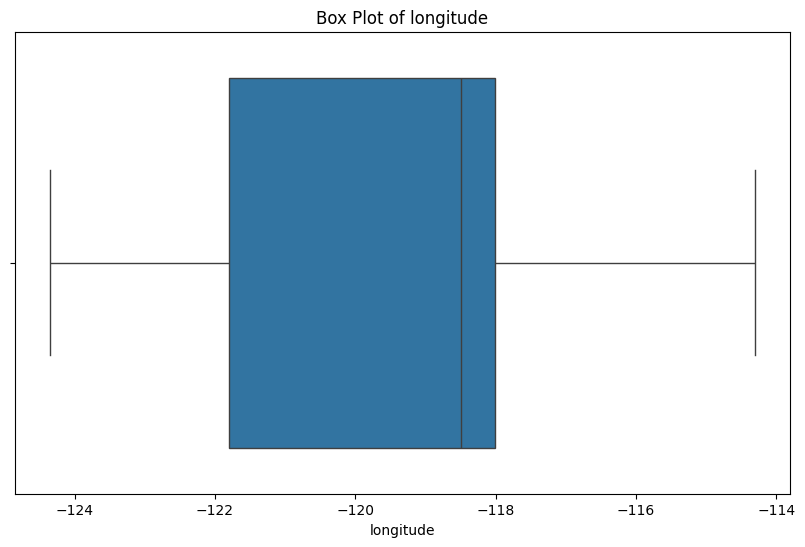

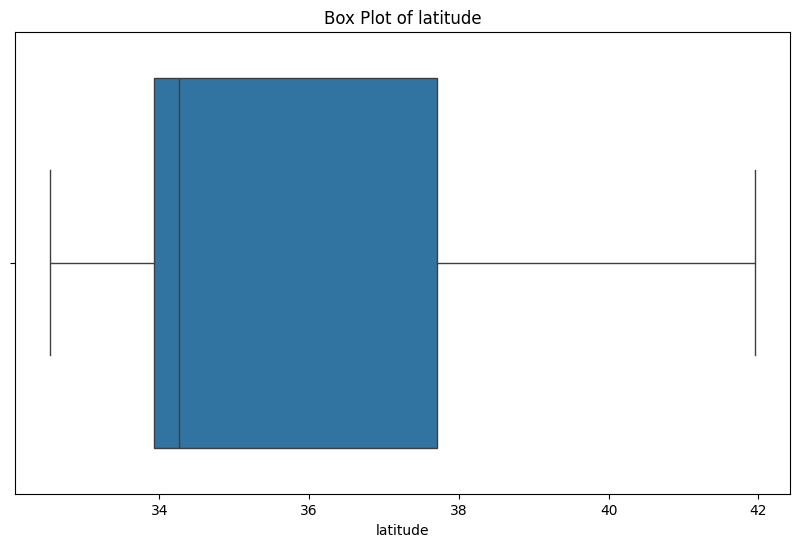

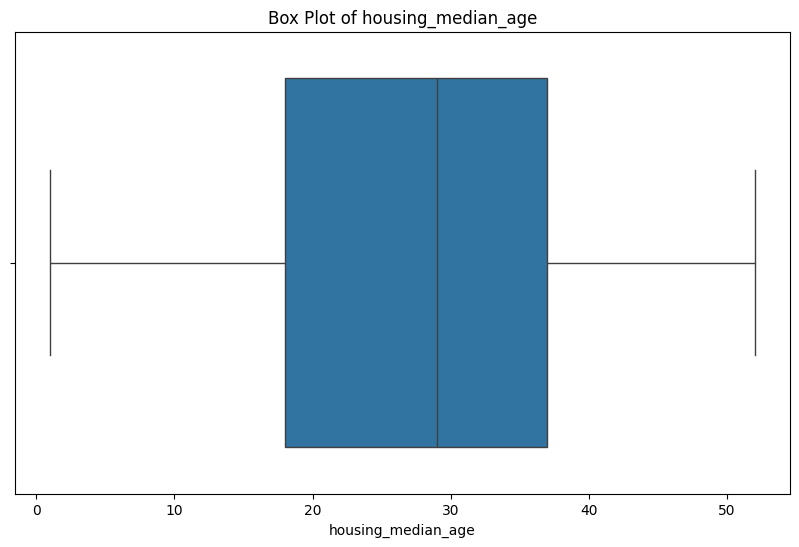

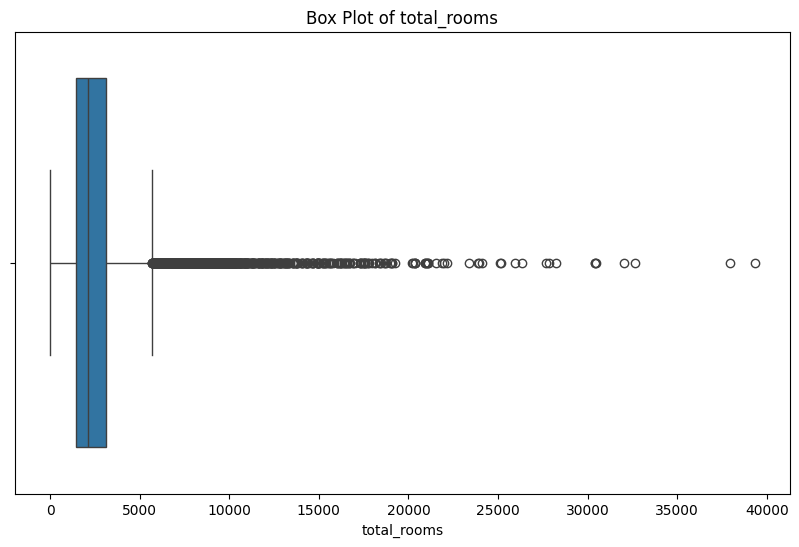

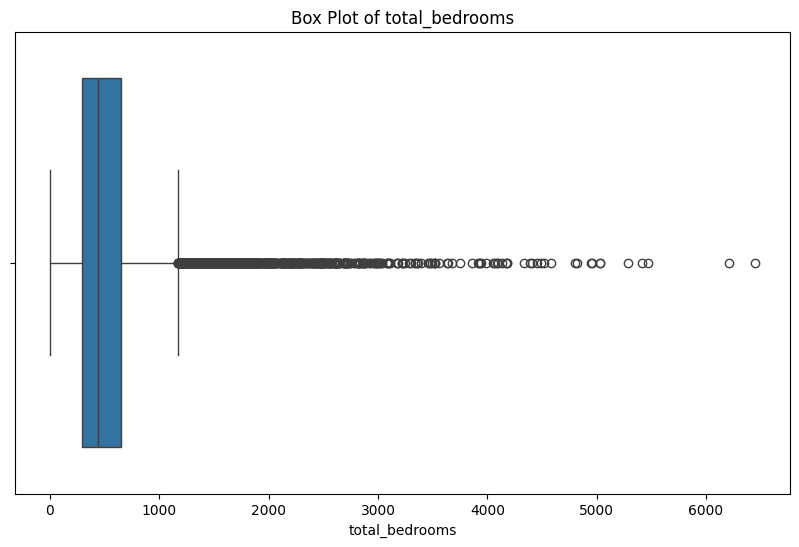

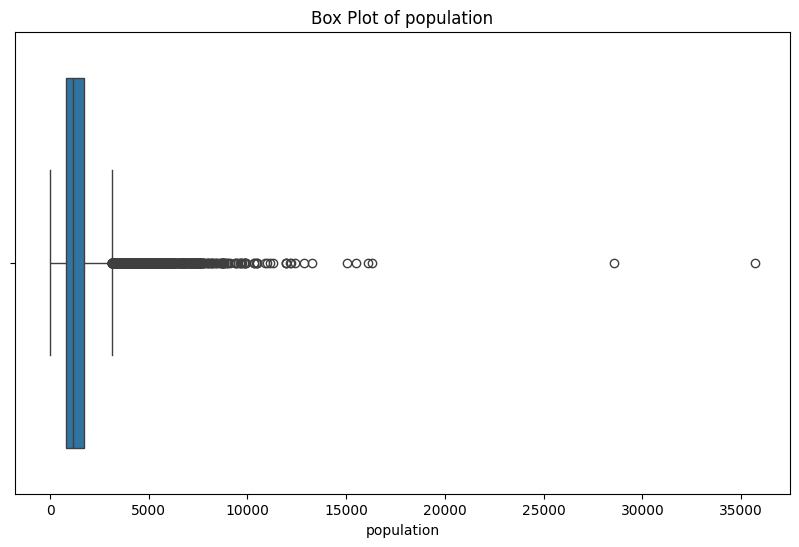

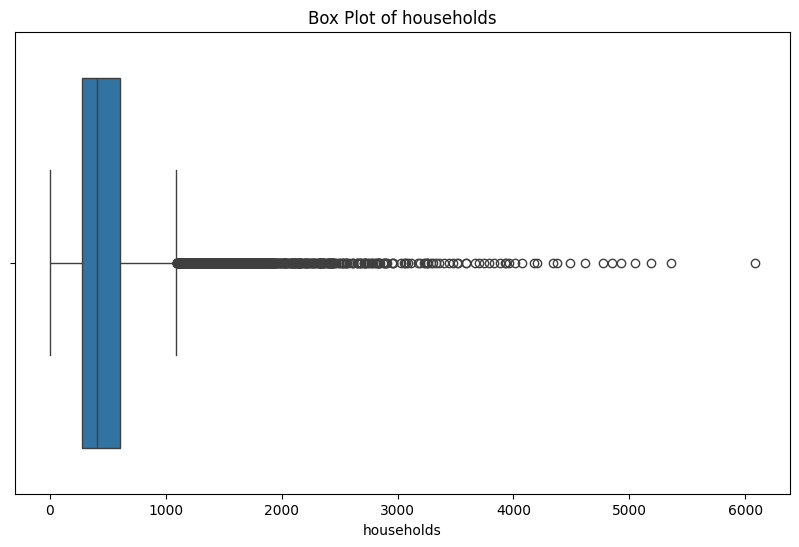

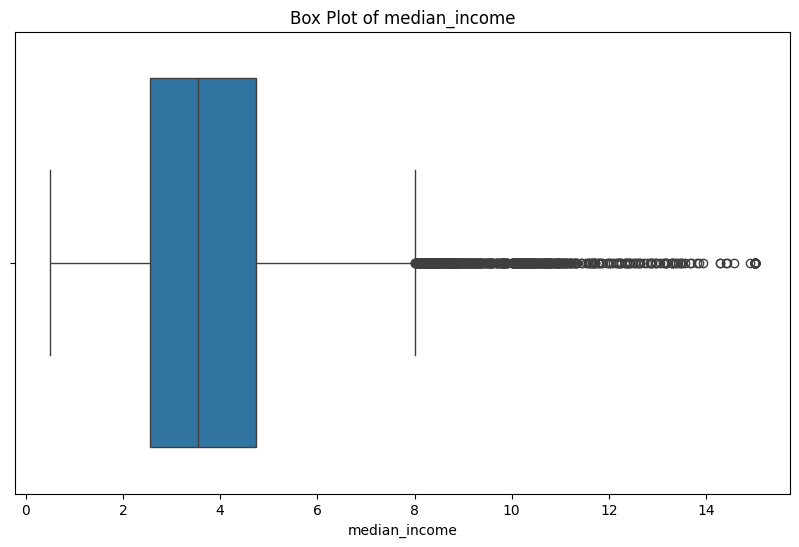

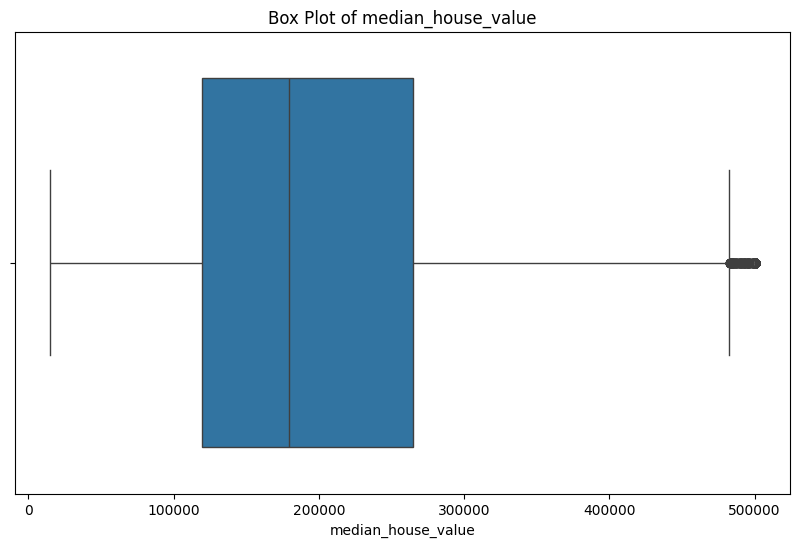

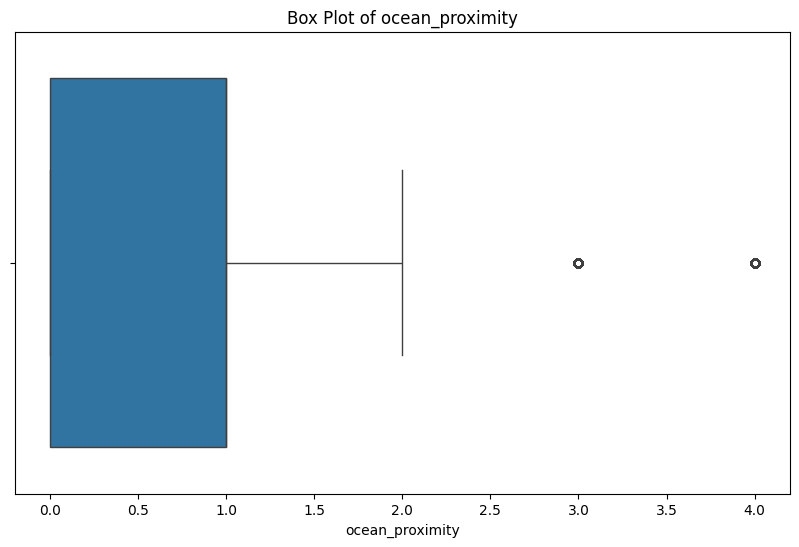

In [ ]:
# Part (c): Analyze the Heatmap and Box Plots

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Highlighting Strong Correlations')
plt.show()

for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column], orient='h')
    plt.title(f'Box Plot of {column}')
    plt.show()


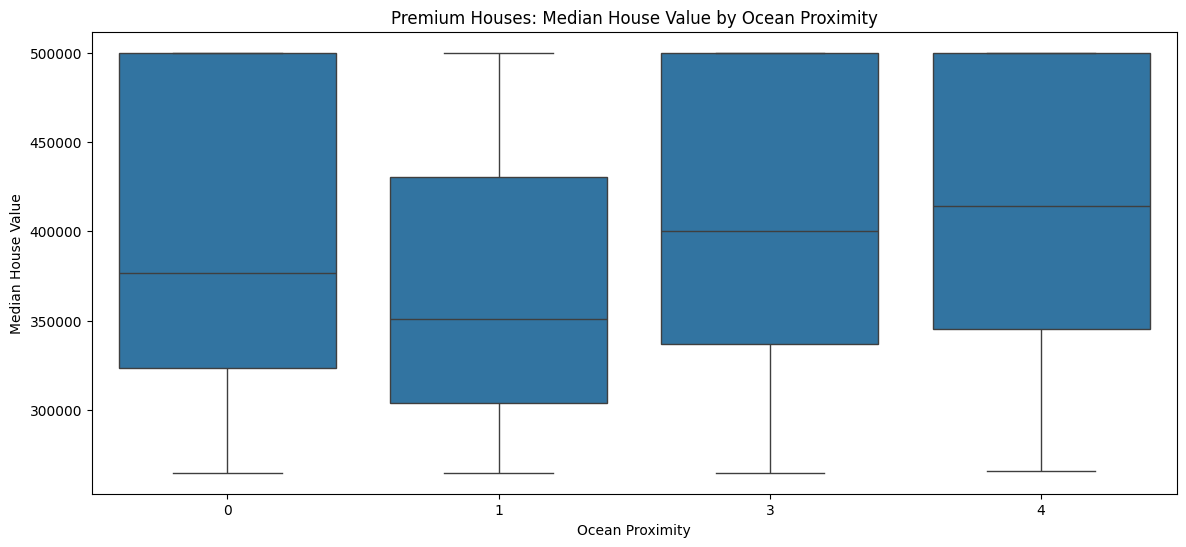

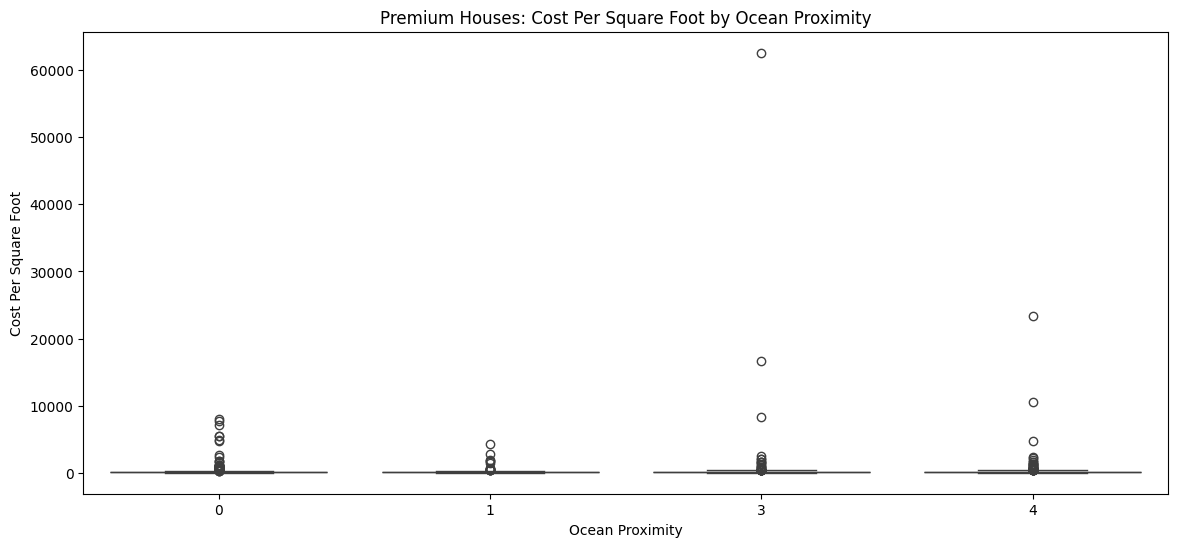

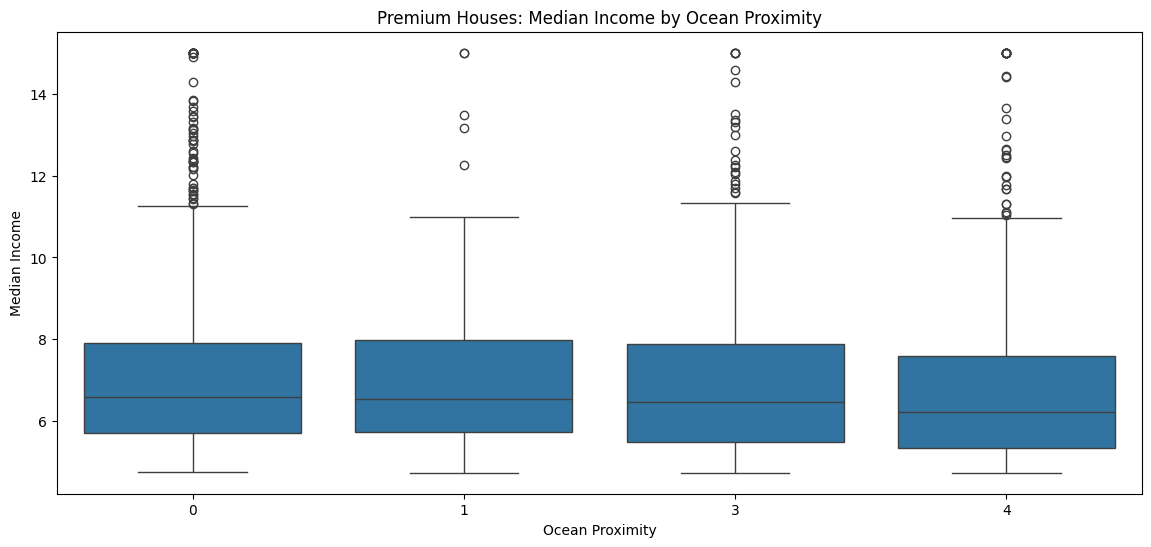

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Part (d): Identify and Visualize Characteristics of Premium Houses
data['cost_per_sqft'] = data['median_house_value'] / data['total_rooms']


premium_houses = data[(data['median_house_value'] > data['median_house_value'].quantile(0.75)) &
                      (data['cost_per_sqft'] > data['cost_per_sqft'].median()) &
                      (data['median_income'] > data['median_income'].quantile(0.75))]


plt.figure(figsize=(14, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=premium_houses)
plt.title('Premium Houses: Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()


plt.figure(figsize=(14, 6))
sns.boxplot(x='ocean_proximity', y='cost_per_sqft', data=premium_houses)
plt.title('Premium Houses: Cost Per Square Foot by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Cost Per Square Foot')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='ocean_proximity', y='median_income', data=premium_houses)
plt.title('Premium Houses: Median Income by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median Income')
plt.show()


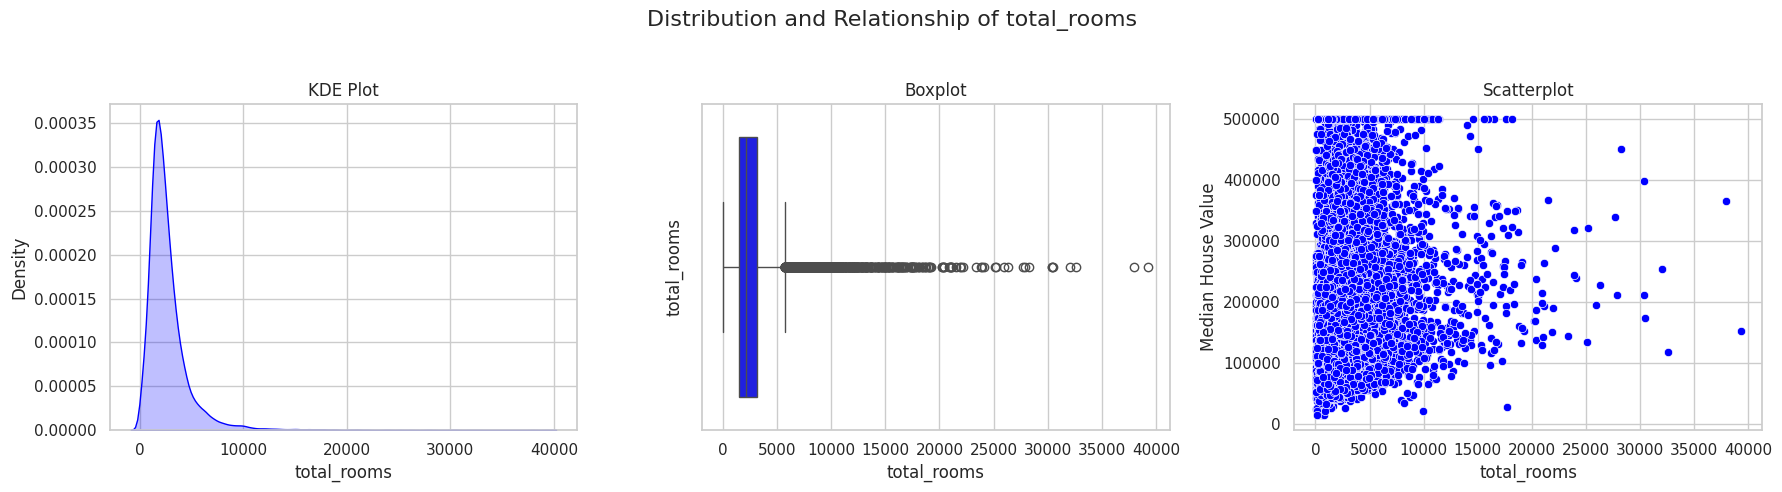

In [ ]:
#Q12Relationship of features with dataset
def visualize_column_distribution(data, column):

    sns.set(style='whitegrid')

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Distribution and Relationship of {column}', fontsize=16)

    sns.kdeplot(data[column], ax=axes[0], fill=True, color='blue')
    axes[0].set_title('KDE Plot')
    axes[0].set_xlabel(column)

    sns.boxplot(x=data[column], ax=axes[1], color='blue')
    axes[1].set_title('Boxplot')
    axes[1].set_ylabel(column)


    sns.scatterplot(x=data[column], y=data['median_house_value'], ax=axes[2], color='blue')
    axes[2].set_title('Scatterplot')
    axes[2].set_xlabel(column)
    axes[2].set_ylabel('Median House Value')


    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


data = pd.read_csv('housing.csv')
visualize_column_distribution(data, 'total_rooms')


Total number of outliers in 'median_house_value': 1383


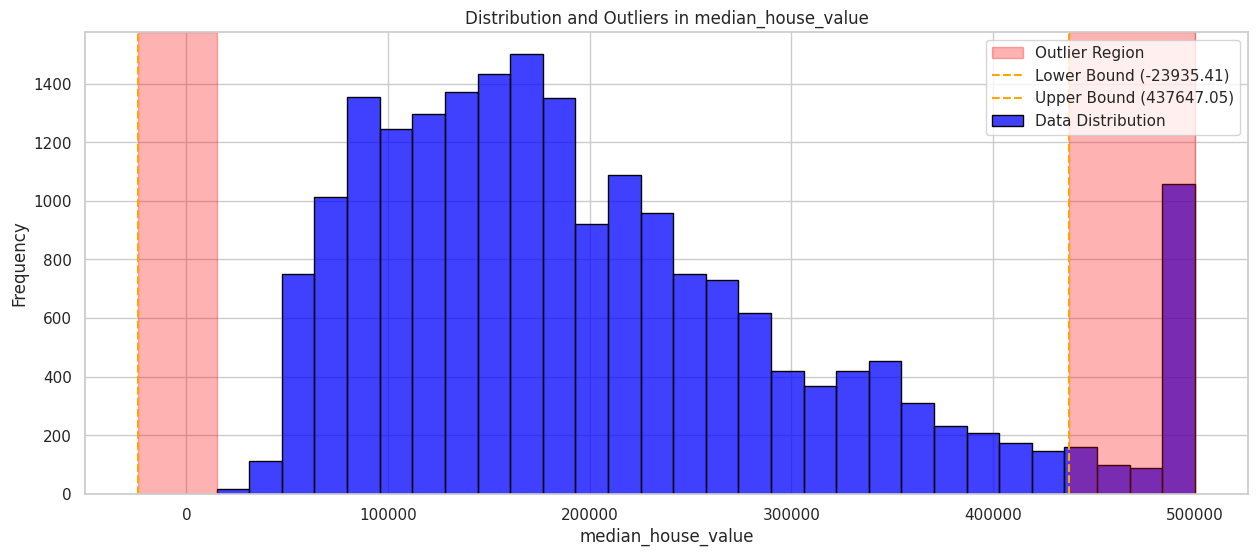

In [ ]:
#Q13 outliners representation by std deviation



def identify_and_visualize_outliers(data, column):

    mean = data[column].mean()
    std_dev = data[column].std()


    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev


    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]


    num_outliers = outliers.shape[0]
    print(f"Total number of outliers in '{column}': {num_outliers}")


    plt.figure(figsize=(15, 6))


    sns.histplot(data[column], bins=30, kde=False, color='blue', edgecolor='black', label='Data Distribution')


    plt.axvspan(xmin=data[column].min(), xmax=lower_bound, color='red', alpha=0.3, label='Outlier Region')
    plt.axvspan(xmin=upper_bound, xmax=data[column].max(), color='red', alpha=0.3)


    plt.axvline(lower_bound, color='orange', linestyle='--', label=f'Lower Bound ({lower_bound:.2f})')
    plt.axvline(upper_bound, color='orange', linestyle='--', label=f'Upper Bound ({upper_bound:.2f})')

    plt.title(f'Distribution and Outliers in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


data = pd.read_csv('housing.csv')
identify_and_visualize_outliers(data, 'median_house_value')



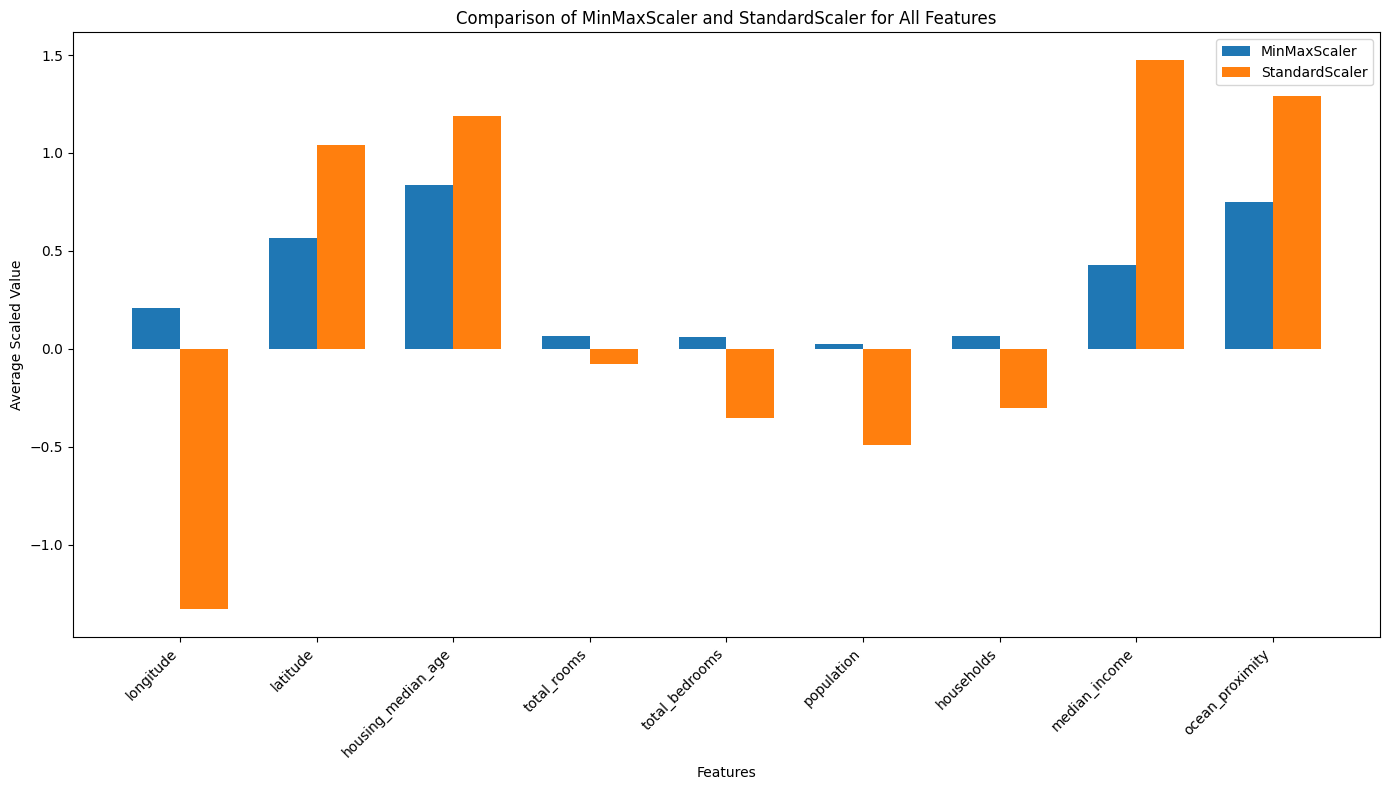

In [ ]:
#Q14  Performing Feature Scaling
data=pd.read_csv('housing.csv')


from sklearn.preprocessing import MinMaxScaler, StandardScaler


label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


x = data.drop(['median_house_value'], axis=1).values
y = data['median_house_value'].values


mm_scaler = MinMaxScaler()
x_mm = mm_scaler.fit_transform(x)

s_scaler = StandardScaler()
x_s = s_scaler.fit_transform(x)

features = data.drop(['median_house_value'], axis=1).columns
num_features = len(features)
samples = np.arange(num_features)

# Plotting
plt.figure(figsize=(14, 8))

# Average scaled values for the first 5 samples
mm_avg = np.mean(x_mm[:5, :], axis=0)
s_avg = np.mean(x_s[:5, :], axis=0)

# Plotting bar graph
width = 0.35  # Width of bars
plt.bar(samples - width/2, mm_avg, width=width, label='MinMaxScaler')
plt.bar(samples + width/2, s_avg, width=width, label='StandardScaler')

plt.xlabel('Features')
plt.ylabel('Average Scaled Value')
plt.title('Comparison of MinMaxScaler and StandardScaler for All Features')
plt.xticks(samples, features, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()